In [17]:
import os 
import pandas as pd 
import numpy as np 
import pickle 
import matplotlib.pyplot as plt

In [18]:
base_folder="/data/digbose92/ads_complete_repo/ads_latest_annotations/ads_completed_annotation_v1/ads_annotation_pkl_files" #loactions of the pickle files containing the parsed labels
file_list=os.listdir(base_folder)
print(len(file_list))

17


In [24]:
#read one pickle file and check the details 
from collections import Counter
from tqdm import tqdm 

number_files=0
social_message_list=[]

start_tone_annot_list=[]
middle_tone_annot_list=[]
end_tone_annot_list=[]

video_file_list=[]
start_majority_tone_list=[]
middle_majority_tone_list=[]
end_majority_tone_list=[]

#pie chart distribution for start tone 
start_all_diff=0
start_two_maj=0
start_single_maj=0

#pie chart distribution for middle tone 
mid_all_diff=0
mid_two_maj=0
mid_single_maj=0

#pie chart distribution for ending tone 
end_all_diff=0
end_two_maj=0
end_single_maj=0


for file in tqdm(file_list):
    pkl_file=os.path.join(base_folder,file)
    
    with open(pkl_file,"rb") as f:
        current_split_data=pickle.load(f)
        
    number_files=number_files+len(current_split_data.keys())
    
    #list of keys for current split data
    key_list=sorted(list(current_split_data.keys()))
    
    #key list 
    for key in key_list:
         
        #video file here
        video_file=current_split_data[key]['Url'].split("/")[-1]
        video_file_list.append(video_file)
        
        #start,middle,ending tone distribution
        start_annotator_wise_tone=current_split_data[key]['Start']['Tone']
        middle_annotator_wise_tone=current_split_data[key]['Middle']['Tone']
        ending_annotator_wise_tone=current_split_data[key]['End']['Tone']
        
        #start, middle and end tone list
        start_tone_annot_list=start_tone_annot_list+start_annotator_wise_tone
        middle_tone_annot_list=middle_tone_annot_list+middle_annotator_wise_tone
        end_tone_annot_list=end_tone_annot_list+ending_annotator_wise_tone
        
        #majority tone labels 
        start_tone_majority=current_split_data[key]['Start']['Majority_tone']
        middle_tone_majority=current_split_data[key]['Middle']['Majority_tone']
        end_tone_majority=current_split_data[key]['End']['Majority_tone']
        
        #start,middle and ending majority tone labels
        start_majority_tone_list.append(start_tone_majority)
        middle_majority_tone_list.append(middle_tone_majority)
        end_majority_tone_list.append(end_tone_majority)
        
        #start counter, middle counter and ending counter
        start_counter=Counter(start_annotator_wise_tone)
        mid_counter=Counter(middle_annotator_wise_tone)
        end_counter=Counter(ending_annotator_wise_tone)
        
        #start, middle and ending common
        start_value, start_count = start_counter.most_common()[0]
        mid_value, mid_count = mid_counter.most_common()[0]
        end_value,end_count= end_counter.most_common()[0]
        
        #start,middle and ending counter values 
        #print(start_counter,start_value,start_count)
        #print(mid_counter,mid_value,mid_count)
        #print(end_counter,end_value,end_count)
        
        #assign the start section
        if(start_count==1):
            start_all_diff+=1
        elif(start_count==2):
            start_two_maj+=1
        elif(start_count==3):
            start_single_maj+=1
            
        #assign the middle section
        if(mid_count==1):
            mid_all_diff+=1
        elif(mid_count==2):
            mid_two_maj+=1
        elif(mid_count==3):
            mid_single_maj+=1
            
        #assign the ending section
        if(end_count==1):
            end_all_diff+=1
        elif(end_count==2):
            end_two_maj+=1
        elif(end_count==3):
            end_single_maj+=1
        
        
        
        
    

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:02<00:00,  8.29it/s]


In [20]:
#start stats 
print(start_all_diff,start_two_maj,start_single_maj)

747 5078 2633


In [21]:
#middle stats 
print(mid_all_diff,mid_two_maj,mid_single_maj)

708 4371 3379


In [22]:
#ending stats 
print(end_all_diff,end_two_maj,end_single_maj)

464 3844 4150


In [11]:
3844+4150

7994

In [14]:
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 15.1 MB/s eta 0:00:00


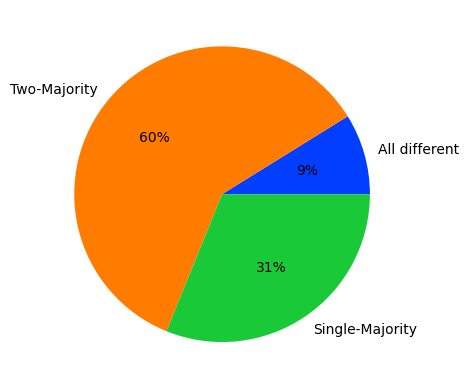

In [4]:
#generate pie chart distributions for start tone (across annotators)
import seaborn 
folder="/data/digbose92/ads_complete_repo/ads_codes/SAIM-ADS/plot_figs"


start_tone_list=[start_all_diff,start_two_maj,start_single_maj]
keys=['All different','Two-Majority','Single-Majority']
palette_color = seaborn.color_palette('bright')
  
# plotting data on chart
plt.pie(start_tone_list, labels=keys, colors=palette_color, autopct='%.0f%%')
filename=os.path.join(folder,"start_tone_distribution.png")

plt.savefig(filename,dpi=300)


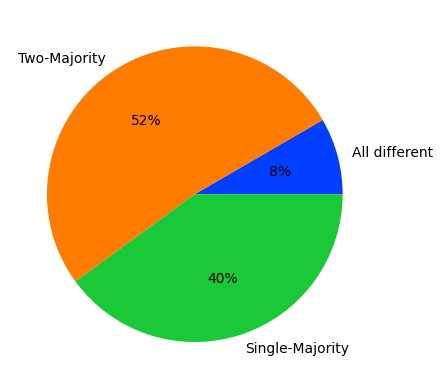

In [20]:
mid_tone_list=[mid_all_diff,mid_two_maj,mid_single_maj]
keys=['All different','Two-Majority','Single-Majority']
palette_color = seaborn.color_palette('bright')
  
# plotting data on chart
plt.pie(mid_tone_list, labels=keys, colors=palette_color, autopct='%.0f%%')
filename=os.path.join(folder,"middle_tone_distribution.png")

plt.savefig(filename,dpi=300)

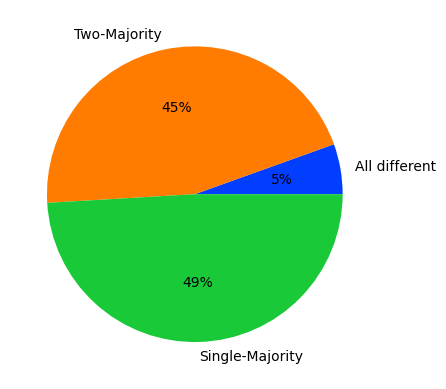

In [21]:
end_tone_list=[end_all_diff,end_two_maj,end_single_maj]
keys=['All different','Two-Majority','Single-Majority']
palette_color = seaborn.color_palette('bright')
  
# plotting data on chart
plt.pie(end_tone_list, labels=keys, colors=palette_color, autopct='%.0f%%')
filename=os.path.join(folder,"end_tone_distribution.png")

plt.savefig(filename,dpi=300)

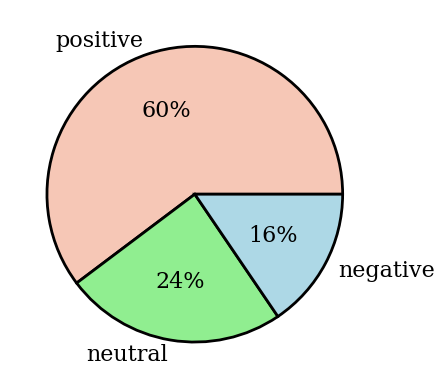

In [12]:
# pie chart for the start majority tone distribution
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 16})

palette_colors = ['#f6c7b6', '#90EE90', '#ADD8E6']

start_tone_maj_counter=dict(Counter(start_majority_tone_list))
keys=list(start_tone_maj_counter.keys())
values=[start_tone_maj_counter[k] for k in keys]
wp = {'linewidth': 2, 'edgecolor': 'black'}

plt.pie(values, labels=keys, colors=palette_colors, autopct='%.0f%%',  wedgeprops=wp)

#save the figures
filename=os.path.join(folder,"start_tone_3_class_label_distribution.png")
plt.savefig(filename,dpi=300)

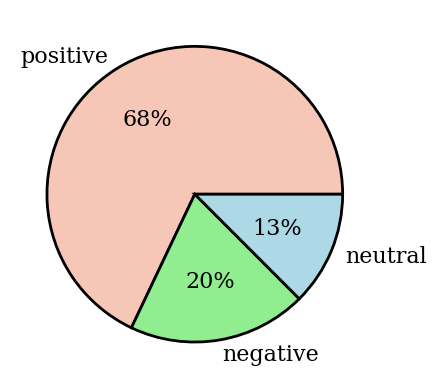

In [13]:
# pie chart for the middle majority tone distribution
middle_tone_maj_counter=Counter(middle_majority_tone_list)
keys=list(middle_tone_maj_counter.keys())
values=[middle_tone_maj_counter[k] for k in keys]
wp = {'linewidth': 2, 'edgecolor': 'black'}
plt.pie(values, labels=keys, colors=palette_colors, autopct='%.0f%%',  wedgeprops=wp)

#print(middle_tone_maj_counter)
#save the figures
filename=os.path.join(folder,"middle_tone_3_class_label_distribution.png")
plt.savefig(filename,dpi=300)

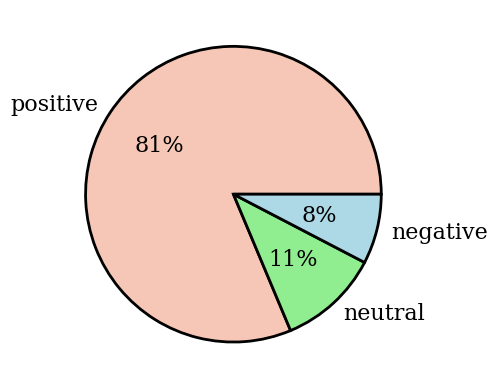

In [14]:
# pie chart for the end majority tone distribution
end_tone_maj_counter=Counter(end_majority_tone_list)
#print(end_tone_maj_counter)
keys=list(end_tone_maj_counter.keys())
values=[end_tone_maj_counter[k] for k in keys]
wp = {'linewidth': 2, 'edgecolor': 'black'}
plt.pie(values, labels=keys, colors=palette_colors, autopct='%.0f%%',  wedgeprops=wp)


filename=os.path.join(folder,"end_tone_3_class_label_distribution.png")
plt.savefig(filename,dpi=300)

Counter({'positive': 14038, 'neutral': 7239, 'negative': 4090})


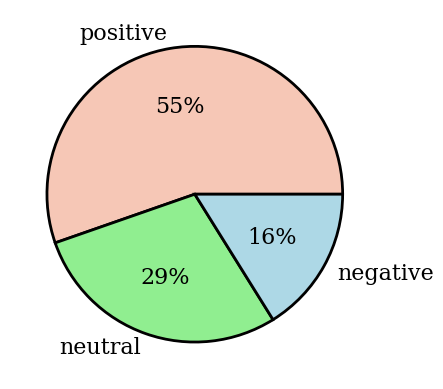

In [25]:
#pie chart for start tone distribution across all annotators 

start_tone_counter=Counter(start_tone_annot_list)
print(start_tone_counter)
keys=list(start_tone_counter.keys())
values=[start_tone_counter[k] for k in keys]
wp = {'linewidth': 2, 'edgecolor': 'black'}
plt.pie(values, labels=keys, colors=palette_colors, autopct='%.0f%%',  wedgeprops=wp)

filename=os.path.join(folder,"start_tone_annotator_wise_label_distribution.png")
plt.savefig(filename,dpi=300)

Counter({'positive': 15762, 'negative': 5006, 'neutral': 4599})


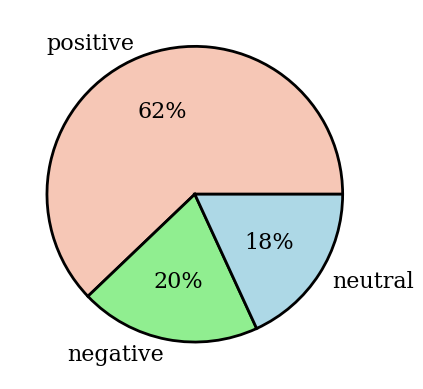

In [26]:
#pie chart for middle tone distribution across all annotators 

middle_tone_counter=Counter(middle_tone_annot_list)
print(middle_tone_counter)
keys=list(middle_tone_counter.keys())
values=[middle_tone_counter[k] for k in keys]
wp = {'linewidth': 2, 'edgecolor': 'black'}
plt.pie(values, labels=keys, colors=palette_colors, autopct='%.0f%%',  wedgeprops=wp)

filename=os.path.join(folder,"middle_tone_annotator_wise_label_distribution.png")
plt.savefig(filename,dpi=300)

Counter({'positive': 18777, 'neutral': 4422, 'negative': 2168})


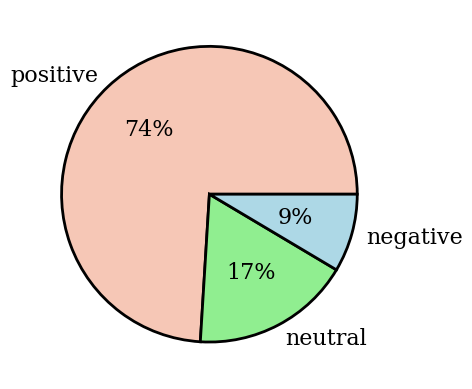

In [27]:
#pie chart for ending tone distribution across all annotators 

ending_tone_counter=Counter(end_tone_annot_list)
print(ending_tone_counter)
keys=list(ending_tone_counter.keys())
values=[ending_tone_counter[k] for k in keys]
wp = {'linewidth': 2, 'edgecolor': 'black'}
plt.pie(values, labels=keys, colors=palette_colors, autopct='%.0f%%',  wedgeprops=wp)

filename=os.path.join(folder,"ending_tone_annotator_wise_label_distribution.png")
plt.savefig(filename,dpi=300)